<a href="https://colab.research.google.com/github/Maedeabm/Stroke-Prediction-Odyssey-From-Classic-Classifiers-to-Transformers/blob/main/Stroke_Prediction_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stroke prediction using Decision Tree Classifier

1. Data Loading

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('stroke_dataset.csv')

2. Data Preprocessing

This step is crucial to transform the raw data into a format suitable for training.

In [ ]:
# Handling missing values (fill or drop based on the nature of the dataset)
data.dropna(inplace=True)

# One-Hot Encoding for categorical variables
data = pd.get_dummies(data, drop_first=True)

# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

X = data.drop('stroke', axis=1)  # Assuming 'stroke' is the target column
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Model Training

Here, you'll train a Decision Tree classifier.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

4. Model Evaluation

You'll want to understand how your model performs on unseen data.

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       929
           1       0.12      0.09      0.10        53

    accuracy                           0.91       982
   macro avg       0.53      0.53      0.53       982
weighted avg       0.90      0.91      0.91       982



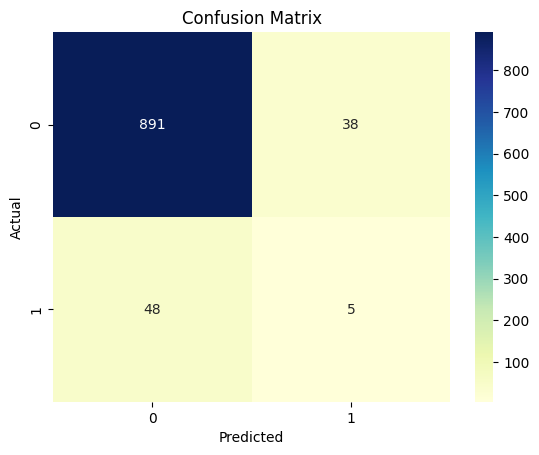

Accuracy: 0.9124236252545825


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions on the test set
y_pred = clf.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


5. Visual Representation of the Decision Tree

Visualizing the tree can help in understanding the decisions made by the model.

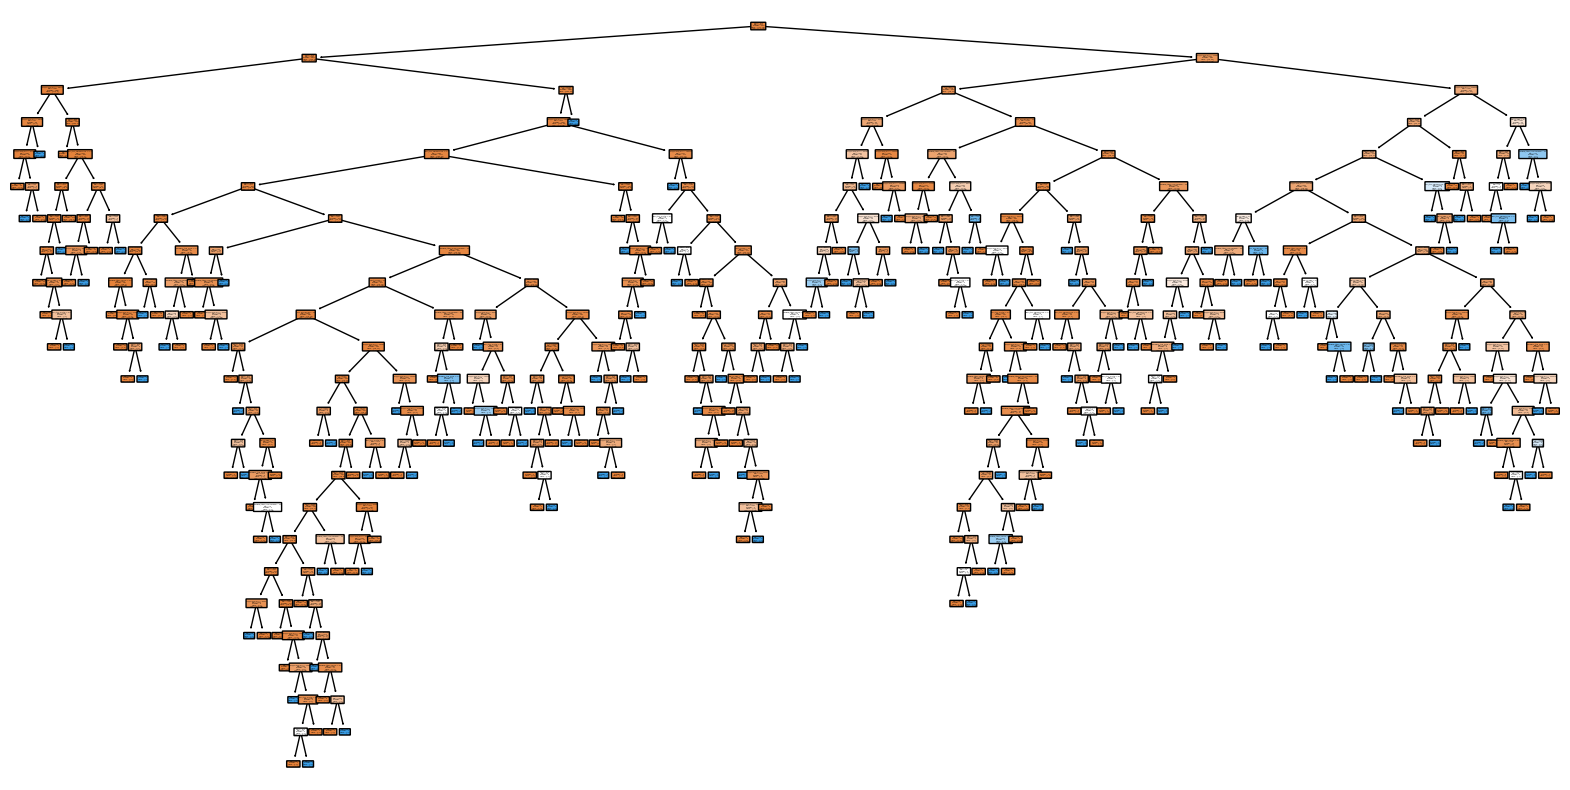

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, rounded=True, feature_names=X.columns, class_names=['No Stroke', 'Stroke'])
plt.show()


Explanation:

Data Loading: You begin by importing the necessary libraries and loading the dataset into a pandas DataFrame.

Data Preprocessing: Here, you clean the data by handling missing values and encode categorical variables to be fed into a machine learning model. Then, you split the data into training and test sets.

Model Training: You use the Decision Tree classifier from Scikit-learn to train the model on the training data.

Model Evaluation: After making predictions on the test set, you evaluate the model's performance using a classification report, confusion matrix, and accuracy score.

Visual Representation: Finally, you visualize the decision tree. This is a graphical representation of the decisions made by the tree. Each node represents a decision based on one of the input features, and the leaves represent the final predictions (stroke or no stroke).

Remember, while decision trees are interpretable and easy to visualize, they might be prone to overfitting, especially if they're grown very deep. It might be beneficial to tune hyperparameters, like max_depth, to optimize the tree's performance.

### Some other metrics:

In addition to the metrics you already have (like accuracy and the confusion matrix), let's incorporate some other valuable metrics that provide a more comprehensive assessment of your Decision Tree classifier's performance:

Precision, Recall, and F1-Score: These are already included in the classification_report, but just to highlight:
        
- Precision: Of all the predicted positive instances, how many were correctly predicted?
        
- Recall (Sensitivity): Of all the actual positive instances, how many were correctly predicted?
        
- F1-Score: Harmonic mean of precision and recall, providing a balance between the two.

ROC Curve and AUC:
        
- ROC Curve: A graph showing the performance of a classification model at all classification thresholds.
- AUC: Represents the area under the ROC curve, and a higher value indicates better classification performance.

Feature Importance: Decision trees inherently provide the importance of features, which can be great for interpretability.

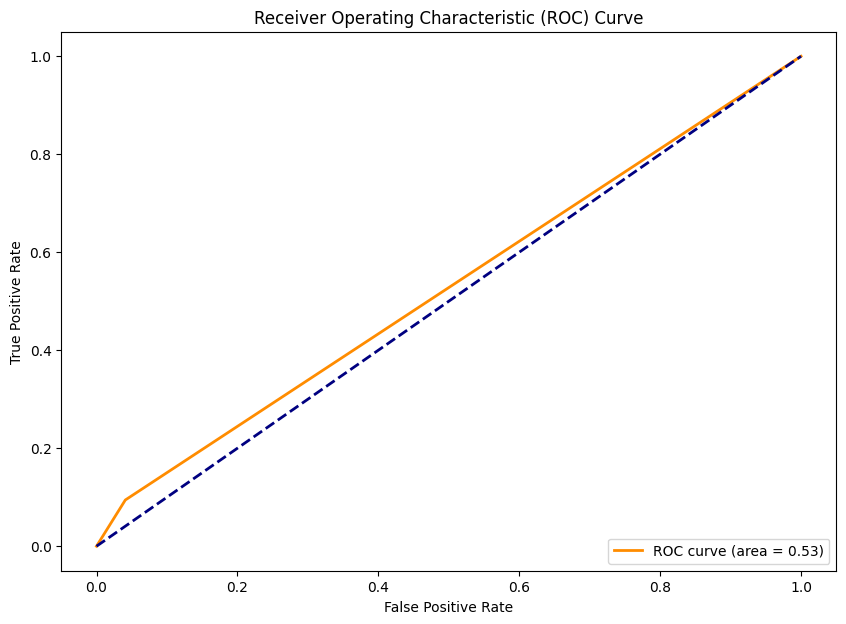

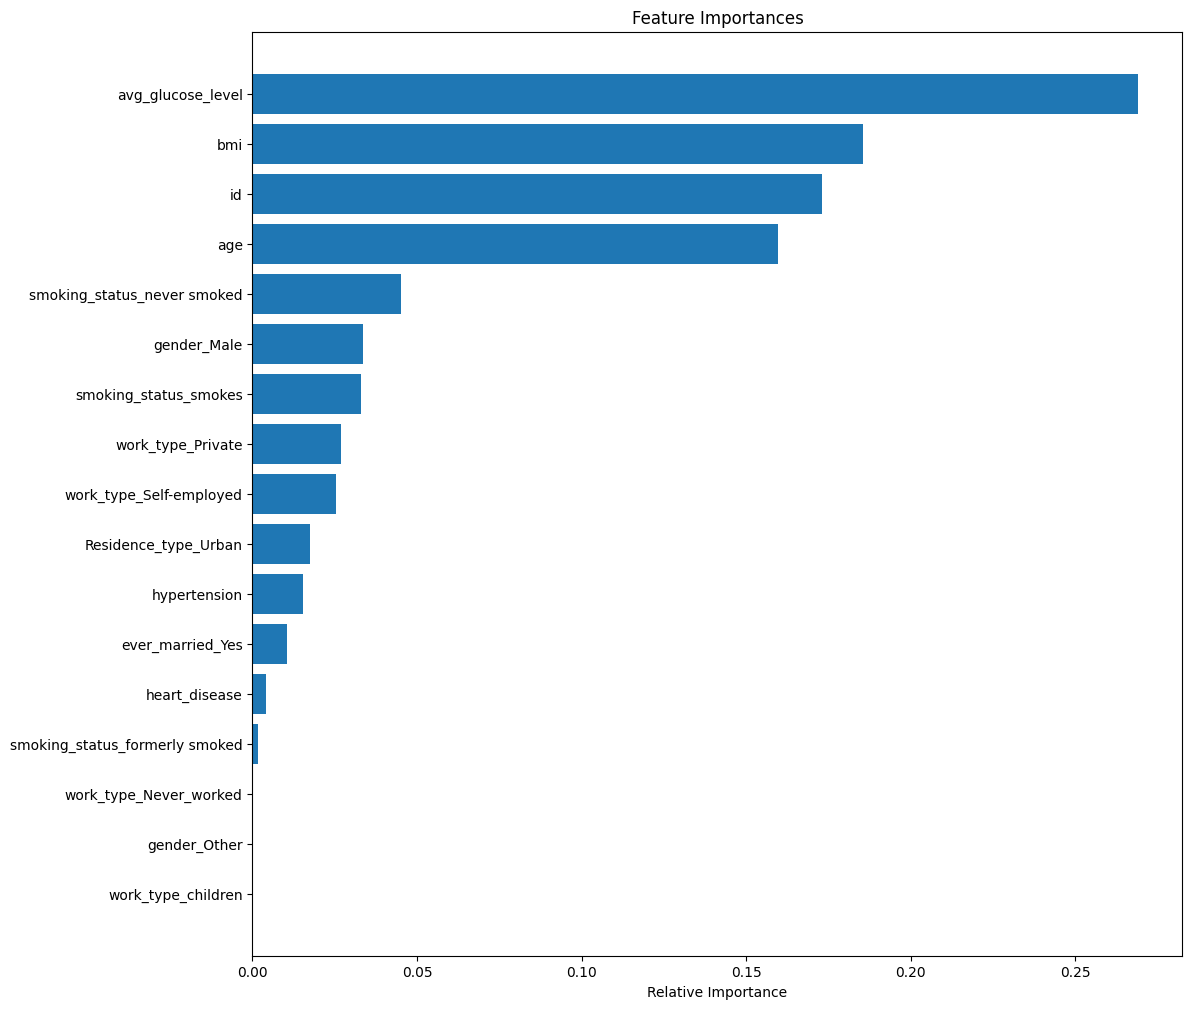

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# ROC Curve
y_prob = clf.predict_proba(X_test)[:,1] # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Feature Importance
features = X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
